Начинаем с двумерного датасета

In [1]:
from google.colab import drive
import numpy as np
drive.mount('/content/gdrive')
path = '/content/gdrive/MyDrive/Python/Data_Science_8/data_6/data_2d_6.csv'
df_1 = np.loadtxt(path, delimiter=',')
df_1  # трехмерный массив - уберем первый столбец как имеющий наименьшую дисперсию - применим PCA


Mounted at /content/gdrive


array([[ 0.00000000e+00, -7.68716460e-01,  4.60860308e-01],
       [ 0.00000000e+00,  2.68784756e+00,  2.36696066e+00],
       [ 0.00000000e+00, -2.01379356e-01,  4.70429935e-01],
       [ 0.00000000e+00,  6.08495680e-01,  1.22540003e+00],
       [ 0.00000000e+00, -8.22819045e-02,  1.13721812e+00],
       [ 0.00000000e+00,  2.08306930e+00,  2.69448209e+00],
       [ 0.00000000e+00,  1.50301985e+00,  1.07484727e+00],
       [ 0.00000000e+00,  3.91662001e-01, -2.87497166e-01],
       [ 0.00000000e+00,  3.21377111e-01,  1.29674301e+00],
       [ 0.00000000e+00,  5.91248258e-01,  1.26716412e-01],
       [ 0.00000000e+00,  1.15057763e+00, -2.66403844e-01],
       [ 0.00000000e+00,  9.42586669e-01,  8.67662423e-01],
       [ 0.00000000e+00,  1.35780613e+00,  1.80547155e+00],
       [ 0.00000000e+00,  1.16291991e+00,  2.62243013e+00],
       [ 0.00000000e+00, -9.78685124e-02,  1.01230581e+00],
       [ 0.00000000e+00,  8.57774175e-01,  1.03196525e+00],
       [ 0.00000000e+00,  6.83436732e-01

In [2]:
from sklearn.decomposition import PCA
df_pca_1 = PCA(n_components=2).fit_transform(df_1) # оставляем 2 фичи
df_pca_1

array([[-2.83641422e+00,  1.28479817e+00],
       [ 4.78214137e-01, -7.49171274e-01],
       [-2.54626291e+00,  7.99168801e-01],
       [-1.51149740e+00,  4.76940703e-01],
       [-1.92884529e+00,  1.02993104e+00],
       [ 4.51632806e-01, -6.24703423e-02],
       [-1.19267750e+00, -3.71654112e-01],
       [-2.88582476e+00, -9.27949995e-02],
       [-1.59455976e+00,  7.60837931e-01],
       [-2.43981784e+00, -5.80170566e-02],
       [-2.49075340e+00, -7.38261731e-01],
       [-1.64482547e+00,  9.10530979e-03],
       [-6.53264236e-01,  1.19533113e-01],
       [-6.62802056e-02,  6.96866749e-01],
       [-2.04116469e+00,  9.80888612e-01],
       [-1.54946010e+00,  1.64649031e-01],
       [-2.48683919e+00, -1.93227331e-01],
       [-6.07026328e-01, -6.88666738e-02],
       [-3.43419955e-01,  5.03113036e-01],
       [-2.73793831e+00, -1.74622850e+00],
       [-2.88599367e+00,  9.64076374e-01],
       [-1.00608518e+00,  7.59069321e-01],
       [-1.19896483e+00,  2.39682128e-01],
       [-2.

Полюбопытствуем - не ошибся ли PCA в своей работе )))

In [3]:
if df_1.shape[0] == df_pca_1.shape[0]:   # count of row must be equal !!!
  print('PCA convert correct')
else:
  print("PCA make a bug")

PCA convert correct


Исследуем с помощью KMeans and elbow method

Number of clasters -  1    Dist -  852.6711682905546
Number of clasters -  2    Dist -  350.682498261892
Number of clasters -  3    Dist -  268.80046221579124
Number of clasters -  4    Dist -  214.46456777025105
Number of clasters -  5    Dist -  166.52314904385878
Number of clasters -  6    Dist -  142.20040508248314
Number of clasters -  7    Dist -  122.95444325681648
Number of clasters -  8    Dist -  105.63711421141909
Number of clasters -  9    Dist -  96.52416492830072
Number of clasters -  10    Dist -  87.31314567005636


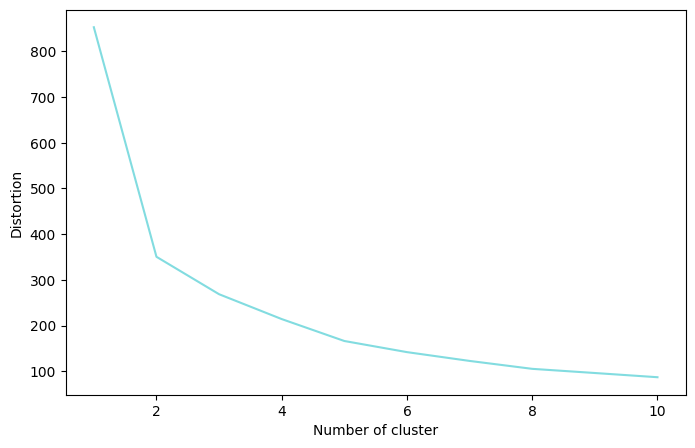

In [4]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data_plot = {}
for n in range(1,11):
  kmeans = KMeans(n_clusters=n, n_init='auto', max_iter=1000).fit(df_pca_1)
  print('Number of clasters - ', n, '   Dist - ', kmeans.inertia_)
  data_plot[n] = kmeans.inertia_
plt.figure(figsize=(8, 5))
plt.plot(list(data_plot.keys()), list(data_plot.values()), color=np.random.rand(3))
plt.xlabel("Number of cluster")
plt.ylabel("Distortion")
plt.show()

Видим перелом в N=2 поэтому и ыбираем количество кластеров равное 2

In [5]:
import pandas as pd
kmeans = KMeans(n_clusters=2, n_init='auto', max_iter=1000).fit(df_pca_1)
#print(kmeans.cluster_centers_) # координаті центоридов
#print(kmeans.labels_)          # принадлежность к  каждому центроиду
cluster_0 = pd.DataFrame([], columns=['X1', 'X2'])    # разделим данные для наглядности визуализации
cluster_1 = pd.DataFrame([], columns=['X1', 'X2'])
for item in range(len(kmeans.labels_)):  # пройдем циклом по датафрейму и сделаем 2 датафрейма
  if kmeans.labels_[item] == 0:
    cluster_0.loc[len(cluster_0), ['X1' , 'X2']] = df_pca_1[item]
  elif kmeans.labels_[item] == 1:
    cluster_1.loc[len(cluster_1), ['X1' , 'X2']] = df_pca_1[item]

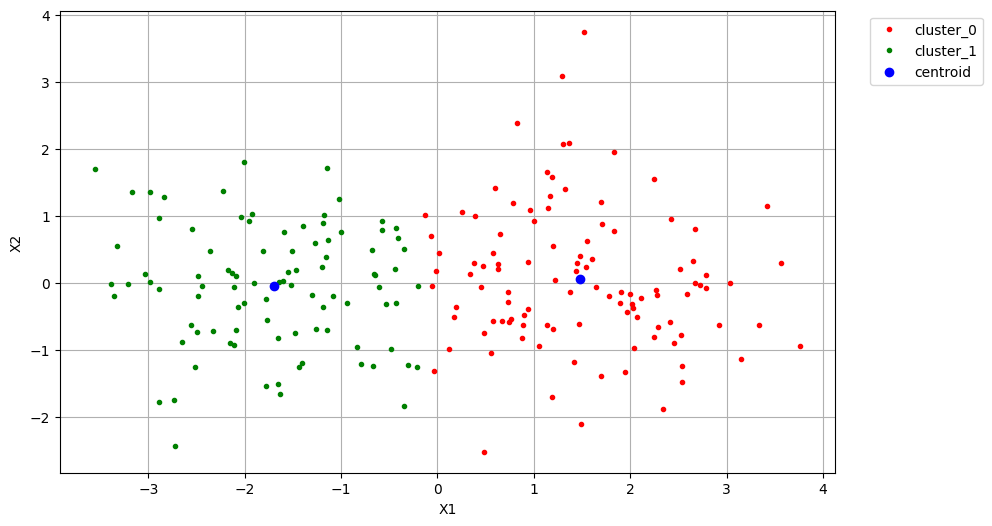

In [6]:
plt.figure(figsize = (10, 6))
plt.plot(cluster_0['X1'], cluster_0['X2'],'.r', label='cluster_0')
plt.plot(cluster_1['X1'], cluster_1['X2'],'.g', label='cluster_1')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ob', label='centroid')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.0))
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

Повторим то же самое для другого датасета

In [9]:
path = '/content/gdrive/MyDrive/Python/Data_Science_8/data_6/mnist_6.csv'
df_1 = np.loadtxt(path, delimiter=',')
print(df_1.shape)
df_1  #  массив 785 столбцов (фичей)

(500, 785)


array([[7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.]])

Применим PCA  - будет убирать по одной фиче за проход - с наименьшей дисперсией (как наиболее предсказуемое, значит для модели самое простое и его можно "исключить") Заодно оценим время работы PCA по времени

In [11]:
import time
t_start = time.time()
from sklearn.decomposition import PCA
df_pca_1 = PCA(n_components=2).fit_transform(df_1) # оставляем 2 фичи
t_end = time.time()
print('PCA running - ', t_end - t_start, ' s')
df_pca_1

PCA running -  0.0766899585723877  s


array([[-2.80482818e+02,  4.49280217e+02],
       [-7.19034315e+01, -1.04577549e+03],
       [-9.67818867e+02, -3.48406242e+02],
       [ 1.05443537e+03, -3.53078772e+02],
       [ 4.19037552e+02,  6.73069302e+02],
       [-1.00109365e+03, -3.07078786e+02],
       [-6.25161238e+01,  4.24892471e+02],
       [-1.71800471e+02,  4.31911774e+02],
       [ 1.83552590e+02,  1.73285049e+02],
       [ 9.03281588e+01,  5.56265227e+02],
       [ 9.52880631e+02, -1.00681073e+03],
       [ 3.60420017e+02, -3.30767987e+02],
       [ 3.27649787e+00,  9.38923065e+02],
       [ 1.08168994e+03, -3.53683679e+02],
       [-1.11412452e+03, -4.16211608e+02],
       [ 1.54829865e+02, -6.37226750e+02],
       [ 4.01439651e+02,  9.30971885e+02],
       [-4.33413689e-01,  3.95287853e+02],
       [ 1.41968089e+02, -4.59342715e+02],
       [ 5.61941347e+01,  7.65652706e+02],
       [-2.65470371e+02,  3.43585528e+02],
       [ 3.14990725e+02, -1.20810106e+02],
       [-2.11023609e+01,  1.66137729e+02],
       [-8.

In [12]:
if df_1.shape[0] == df_pca_1.shape[0]:   # count of row must be equal !!!
  print('PCA convert correct')
else:
  print("PCA make a bug")

PCA convert correct


Далее исследеуем датасет с помощью значащих средних

Number of clasters -  1    Dist -  300104004.20434415
Number of clasters -  2    Dist -  192415418.80719703
Number of clasters -  3    Dist -  102624394.96146196
Number of clasters -  4    Dist -  77121685.99242571
Number of clasters -  5    Dist -  59850987.65434812
Number of clasters -  6    Dist -  49102119.30818085
Number of clasters -  7    Dist -  41573501.17173651
Number of clasters -  8    Dist -  36765356.58520662
Number of clasters -  9    Dist -  33517500.560672194
Number of clasters -  10    Dist -  30266360.358963482


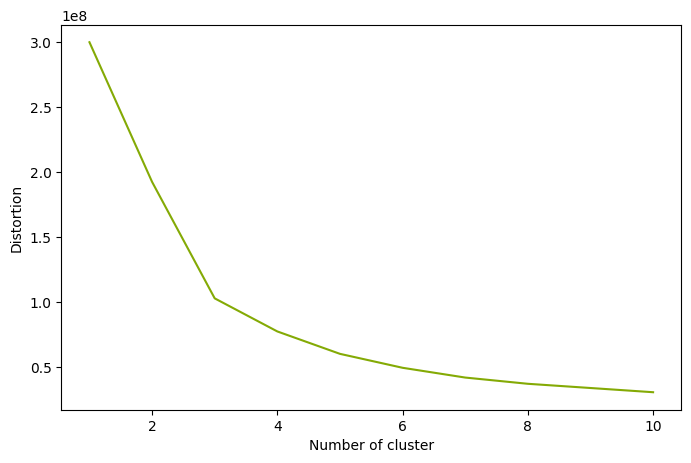

In [13]:
data_plot = {}
for n in range(1,11):
  kmeans = KMeans(n_clusters=n, n_init='auto', max_iter=1000).fit(df_pca_1)
  print('Number of clasters - ', n, '   Dist - ', kmeans.inertia_)
  data_plot[n] = kmeans.inertia_
plt.figure(figsize=(8, 5))
plt.plot(list(data_plot.keys()), list(data_plot.values()), color=np.random.rand(3))
plt.xlabel("Number of cluster")
plt.ylabel("Distortion")
plt.show()

Видим перелом в N=3 поэтому и ыбираем количество кластеров равное 3

In [20]:
kmeans = KMeans(n_clusters=3, n_init='auto', max_iter=1000).fit(df_pca_1)
#print(kmeans.cluster_centers_) # координаті центоридов
#print(kmeans.labels_)          # принадлежность к  каждому центроиду
cluster_0 = pd.DataFrame([], columns=['X1', 'X2'])    # разделим данные для наглядности визуализации
cluster_1 = pd.DataFrame([], columns=['X1', 'X2'])
cluster_2 = pd.DataFrame([], columns=['X1', 'X2'])
for item in range(len(kmeans.labels_)):  # пройдем циклом по датафрейму и сделаем 3 датафрейма
  if kmeans.labels_[item] == 0:
    cluster_0.loc[len(cluster_0), ['X1' , 'X2']] = df_pca_1[item]
  elif kmeans.labels_[item] == 1:
    cluster_1.loc[len(cluster_1), ['X1' , 'X2']] = df_pca_1[item]
  elif kmeans.labels_[item] == 2:
    cluster_2.loc[len(cluster_2), ['X1' , 'X2']] = df_pca_1[item]

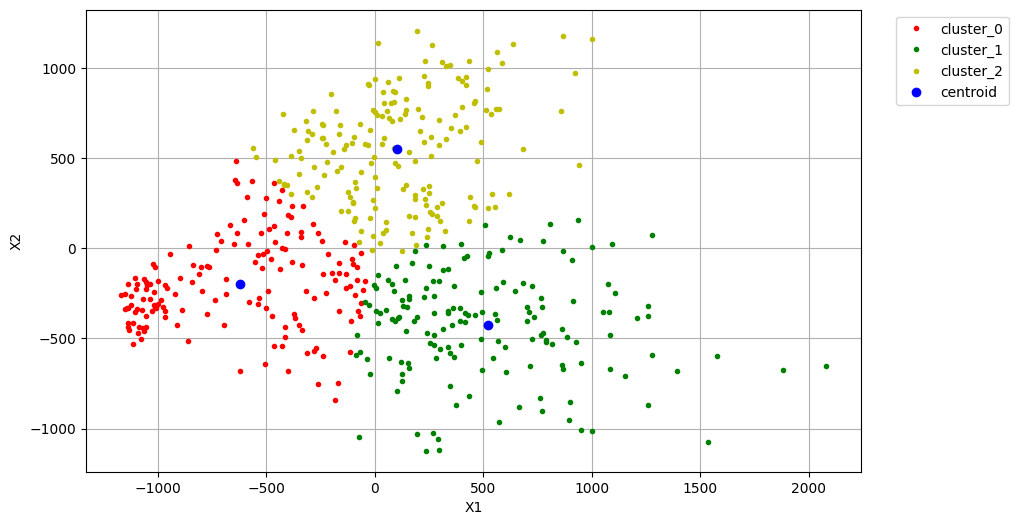

In [21]:
plt.figure(figsize = (10, 6))
plt.plot(cluster_0['X1'], cluster_0['X2'],'.r', label='cluster_0')
plt.plot(cluster_1['X1'], cluster_1['X2'],'.g', label='cluster_1')
plt.plot(cluster_2['X1'], cluster_2['X2'],'.y', label='cluster_2')
plt.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 'ob', label='centroid')
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.0))
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()